# **Medical Cost Personal Dataset**

Medical expenses are any costs incurred in the prevention or treatment of injury or disease. Medical expenses include health and dental insurance premiums, doctor and hospital visits, co-pays, prescription and over-the-counter drugs, glasses and contacts, crutches, and wheelchairs, to name a few. Medical expenses that are not reimbursed are deductible within certain limits.

Link to the dataset : [Click Here](https://www.kaggle.com/mirichoi0218/insurance)

**Columns** :

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

**Import of various Python packages for Analytics**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm


**Import of the Medical Cost Personal Dataset**

In [2]:
df = pd.read_csv('../input/insurance/insurance.csv')

**Showing the columns in the Dataset**

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Finding out the type of the Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Finding out how many values are not null**

In [5]:
df.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

**Replacing the values in 'Smoker' and 'Sex' columns as 0 & 1 for ease**

In [6]:
df.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
df.sex.replace(('female', 'male'), (1, 0), inplace=True)

**Describing the Dataset**




Showing various Means , Medians , Standard Deviation ,Minimum , Quartile 1 , Quartile 3 and Maximum values

In [7]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


**Pairplot of the datset**

Showing various correlationof various columns grouped by the number of children

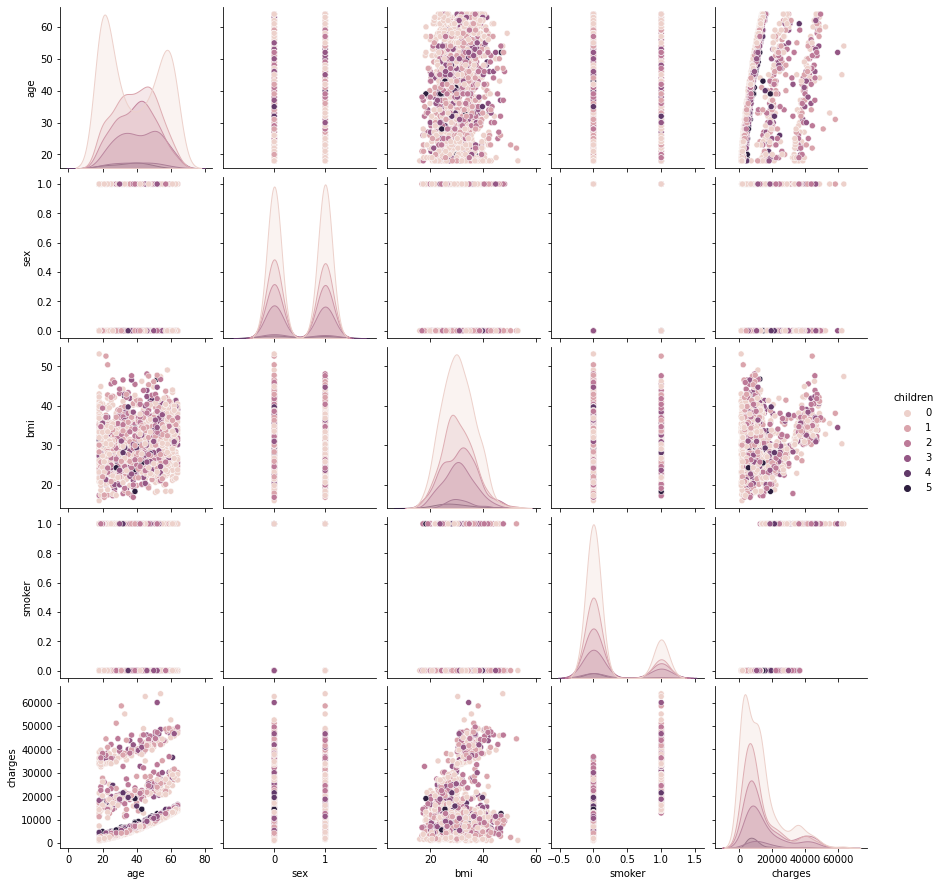

In [8]:
sb.pairplot(df,hue='children')

**Barplot to show the region wise count of smokers in each region**

Shows Southeast Region with highest number of smokers followed by norheast and southwest

Text(0.5, 1.0, 'Region wise smokers count')

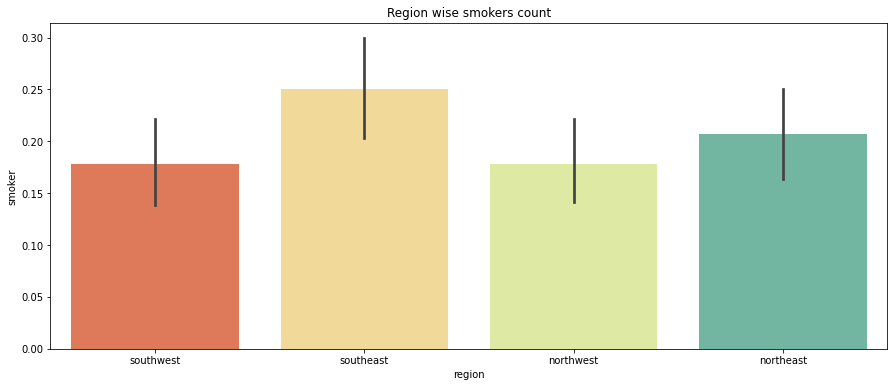

In [9]:
ax= plt.figure(figsize=(15,6))
sb.barplot(x='region', y='smoker', data=df, palette='Spectral' )
plt.title('Region wise smokers count')

**Showing the distribution of number of children of the patients**

Text(0.5, 1.0, 'Showing the distribution of number of children of the patients')

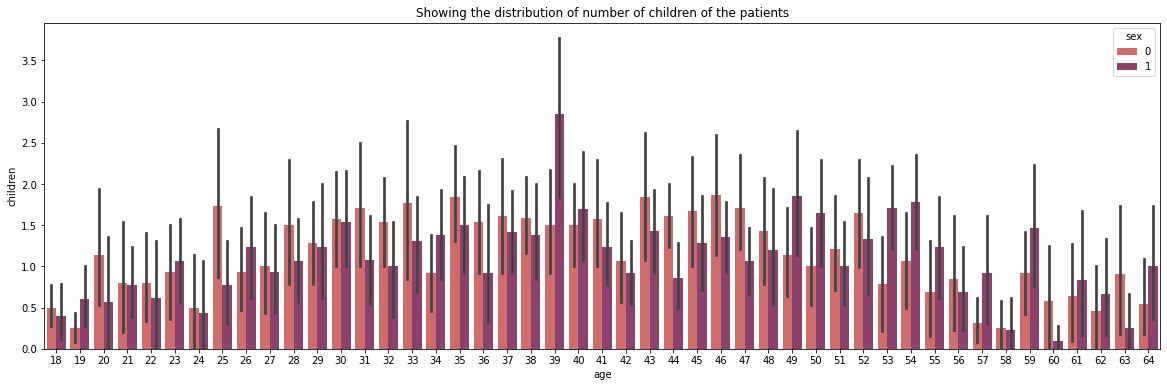

In [10]:
ax= plt.figure(figsize=(20,6))
sb.barplot(x='age', y='children', data=df, palette='flare', hue='sex' )
plt.title('Showing the distribution of number of children of the patients')

**Showing the responsiveness of the medical bill to age**

Text(0.5, 1.0, 'Responsiveness of the medical bill to age')

<Figure size 432x432 with 0 Axes>

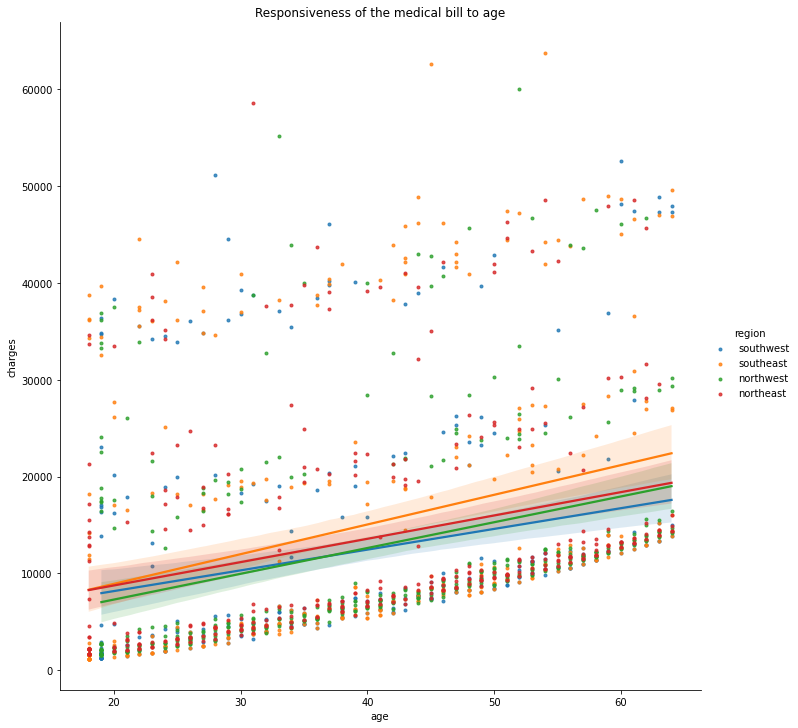

In [11]:
ax= plt.figure(figsize=(6,6))
sb.lmplot(x='age', y= 'charges',data=df,markers='.',hue ='region',height=10,aspect=1)
plt.title('Responsiveness of the medical bill to age')

**Showing age wise distribution of BMI'**

Text(0.5, 1.0, 'Age wise distribution of BMI')

<Figure size 1080x432 with 0 Axes>

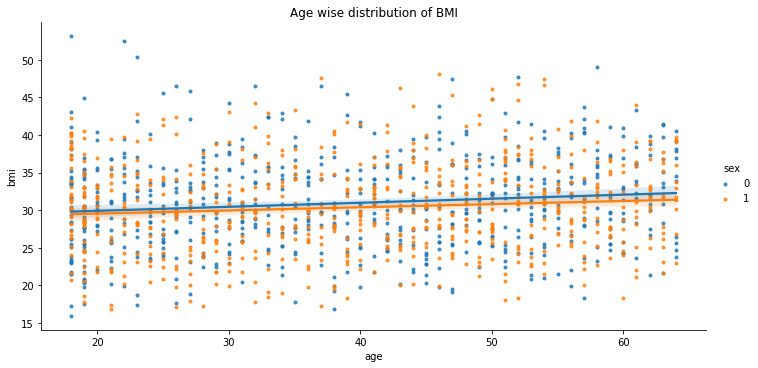

In [12]:
ax= plt.figure(figsize=(15,6))
sb.lmplot(x='age', y= 'bmi',data=df,markers='.',hue='sex',height=5,aspect=2)
plt.title('Age wise distribution of BMI')

**Heatmap**

<AxesSubplot:>

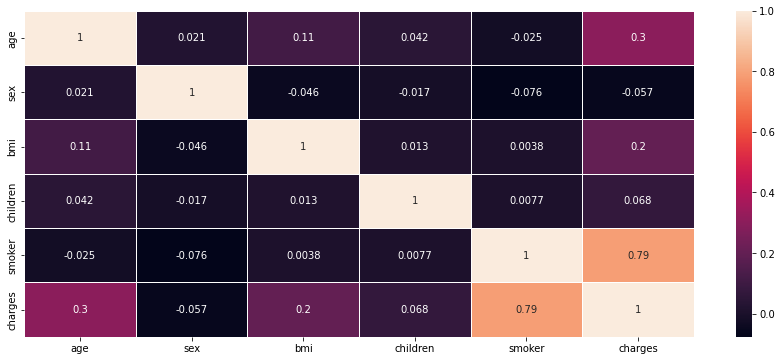

In [13]:
heatmap=df.corr()
ax= plt.figure(figsize=(15,6))
sb.heatmap(heatmap,linewidths=1,linecolor='white',annot=True)

**Droping the Region column for regression analysis**

In [14]:
df.drop(['region'], axis =1, inplace=True)

**Importing Standard Scaler to Standardise the values**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [16]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

**Standardised values**

In [17]:
scaled = scaler.fit_transform(df)
print(scaled)


[[-1.43876426  1.0105187  -0.45332    -0.90861367  1.97058663  0.2985838 ]
 [-1.50996545 -0.98959079  0.5096211  -0.07876719 -0.5074631  -0.95368917]
 [-0.79795355 -0.98959079  0.38330685  1.58092576 -0.5074631  -0.72867467]
 ...
 [-1.50996545  1.0105187   1.0148781  -0.90861367 -0.5074631  -0.96159623]
 [-1.29636188  1.0105187  -0.79781341 -0.90861367 -0.5074631  -0.93036151]
 [ 1.55168573  1.0105187  -0.26138796 -0.90861367  1.97058663  1.31105347]]


**Diving the columns into dependent 'y' and independant 'x' values**

In [18]:
x=df[['age','bmi','children']]
y=df['charges']

**Using Statsmodels to find Linear Regression using OLS method**

In [19]:
x1= sm.add_constant(x)
results = sm.OLS(y,x1)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           8.80e-37
Time:                        19:49:42   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Reshaping the column into 2D**

In [21]:
xs =df['smoker']
xs1=xs.values.reshape(-1,1)
#y=y.values.reshape(-1,1)

**Importing train test split to divide into training and testing set in Scikit Learn**

In [22]:
from sklearn.model_selection import train_test_split

**Training : 70%
Testing : 30%**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(xs1, y, test_size=0.3)

**Importing Linear Regression**

In [24]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

**Fitting and predicting the data**

In [25]:
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

**Finding out the R squared value**

In [26]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,pred))
r2

0.6182821496457809

**Conclusion :**

1. The data is significant as r suared value is >0.5
2. So smokers have somewhat higher bills but these charges might not be due to health problems caused due to smoking 
3. In multiple regression using Statsmodels, the variables age , bmi and children hold significant as p-value are less than 0.05

# Thank You